### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import plotly.express as px

In [3]:
%matplotlib inline

In [4]:
path = '/Users/timovic/Desktop/Climate Analysis - battle station/02 Data'

In [17]:
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'merged_all.pkl'))

In [18]:
df.shape

(6045, 9)

In [19]:
df.head()

,country,year,hdi,gni,co2_consumption,happiness,hdi_groups,undp_regions,happiness category
0,Afghanistan,1990,0.273,2684.550019,NaN,NaN,Low,SA,NaN
1,Afghanistan,1991,0.279,2276.289409,NaN,NaN,Low,SA,NaN
2,Afghanistan,1992,0.287,2059.868084,NaN,NaN,Low,SA,NaN
3,Afghanistan,1993,0.297,1525.533426,NaN,NaN,Low,SA,NaN
4,Afghanistan,1994,0.292,1087.961890,NaN,NaN,Low,SA,NaN


In [20]:
# Drop categorical columns

df.drop(['country', 'hdi_groups', 'undp_regions', 'happiness category'], axis=1, inplace=True)

In [21]:
df.head()

,year,hdi,gni,co2_consumption,happiness
0,1990,0.273,2684.550019,NaN,NaN
1,1991,0.279,2276.289409,NaN,NaN
2,1992,0.287,2059.868084,NaN,NaN
3,1993,0.297,1525.533426,NaN,NaN
4,1994,0.292,1087.961890,NaN,NaN


In [22]:
# Check for null values

df.isnull().sum()

year                  0
hdi                 665
gni                 130
co2_consumption    2501
happiness          5259
dtype: int64

In [23]:
# Drop 'happiness' column (too many nulls) and rows containing null values in other columns

df.drop('happiness', axis=1, inplace=True)

df = df.dropna(subset=['hdi', 'gni', 'co2_consumption'])

In [24]:
df.shape

(3458, 4)

In [26]:
df.drop(df[df.year < 2020].index, inplace=True)

In [27]:
df.shape

(115, 4)

In [28]:
df.head()

,year,hdi,gni,co2_consumption
61,2020,0.794,12996.76291,2.014620
216,2020,0.840,19178.33184,3.534910
247,2020,0.757,12454.14508,2.586914
278,2020,0.947,47078.24446,13.811205
309,2020,0.913,51574.18306,9.118349


### 2. Standardizing data

In [29]:
# Use Standard Scaler to standardize data in the dataframe

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [30]:
# Fit standardized data using PCA

pca = PCA()
pca.fit(segmentation_std)

PCA()

In [31]:
# Show how much variance is explained by each of the four components

pca.explained_variance_ratio_

array([0.8530958 , 0.10954119, 0.03736301, 0.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

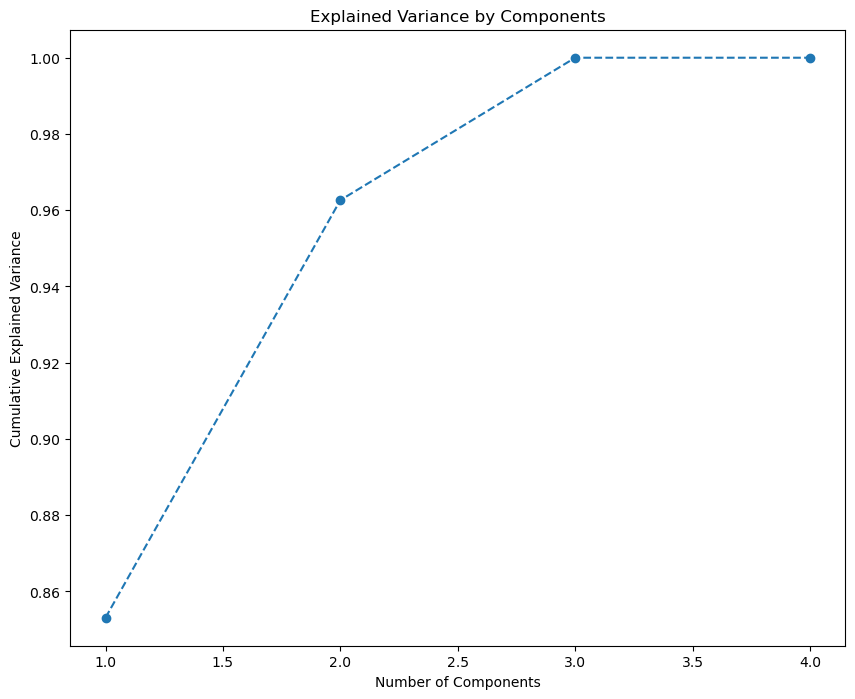

In [33]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Choosing two components is sufficient here, as they preserve about 90 % of the variance.

In [34]:
# Choice of two components based on the above findings

pca = PCA(n_components = 2)

In [35]:
# Fit model to data

pca.fit(segmentation_std)

PCA(n_components=2)

In [36]:
# Extract calculated resulting components for our data set

pca.transform(segmentation_std)

array([[-6.13851680e-01, -6.09576504e-01],
       [-9.75010304e-02, -6.54349975e-01],
       [-7.22984137e-01, -3.51565956e-01],
       [ 2.16262234e+00,  7.57235217e-02],
       [ 1.69271665e+00, -3.36680613e-01],
       [-6.79584600e-01, -6.41177343e-02],
       [ 1.73991112e+00,  5.50684798e-01],
       [-1.52562826e+00, -5.60843575e-02],
       [-1.43842878e-02, -1.82834431e-01],
       [ 2.30911630e+00,  3.67510756e-01],
       [-2.12413956e+00,  5.86669747e-01],
       [-1.18944840e+00, -1.26269846e-01],
       [-6.27067026e-01,  1.32831813e-01],
       [-7.38209626e-01, -4.30181853e-01],
       [ 3.07562061e+00,  1.74784339e+00],
       [-1.33585498e-03, -2.52653532e-01],
       [-2.50093879e+00,  9.19365447e-01],
       [-1.64349306e+00,  4.33775573e-01],
       [-1.92429953e+00,  2.79403089e-01],
       [ 1.95345088e+00,  5.00199001e-02],
       [ 1.30169672e-01, -6.04157643e-01],
       [-1.45848726e-01,  1.65622881e-01],
       [-7.50277079e-01, -4.02734923e-01],
       [-3.

In [37]:
scores_pca = pca.transform(segmentation_std)

### 3. Examining data with elbow technique for k-means clustering

In [38]:
# Define range of potential clusters and define k-means clusters

num_cl = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [39]:
score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))]

In [40]:
score

[-332.1097622478033,
 -117.81431775617969,
 -71.89079097528156,
 -45.01245855623125,
 -32.79908155728692,
 -25.701207674691727,
 -21.48987233751708,
 -17.951080154433647,
 -14.756732382057395,
 -12.934669663132794,
 -11.524661897403524,
 -10.794309744751496,
 -9.595134988709045,
 -8.66820148778963,
 -8.026795955393217,
 -7.764085228355616,
 -6.890942948302111,
 -6.304214238840183,
 -6.176376426357139]

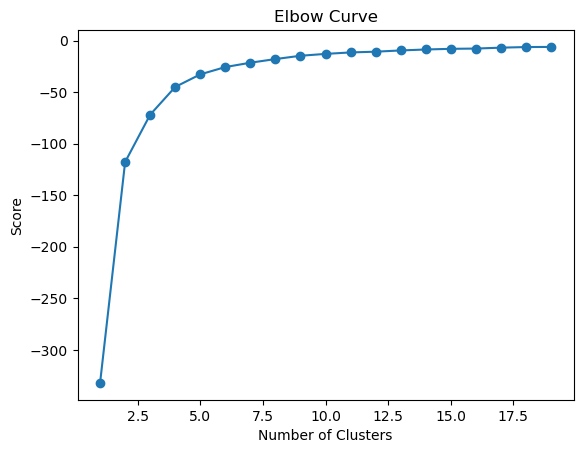

In [41]:
# Plot elbow curve

pl.plot(num_cl,score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title ('Elbow Curve')
pl.show()

The curve becomes smoother after four clusters, which is thus the optimal count.

### 4. k-means clustering

In [42]:
# Create k-means object

kmeans = KMeans(n_clusters = 4)

In [43]:
kmeans.fit(scores_pca)

KMeans(n_clusters=4)

In [44]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
df_pca_kmeans['Segment k-means PCA'] = kmeans.labels_

In [45]:
df_pca_kmeans.head()

,year,hdi,gni,co2_consumption,Component 1,Component 2,Segment k-means PCA
0,2020,0.794,12996.76291,2.014620,-0.613852,-0.609577,2
1,2020,0.840,19178.33184,3.534910,-0.097501,-0.654350,2
2,2020,0.757,12454.14508,2.586914,-0.722984,-0.351566,2
3,2020,0.947,47078.24446,13.811205,2.162622,0.075724,1
4,2020,0.913,51574.18306,9.118349,1.692717,-0.336681,1


In [46]:
# Create a new Segment column for easier cluster readabilty

df_pca_kmeans['Segment'] = df_pca_kmeans['Segment k-means PCA'].map({0: 'first', 
                                                                    1: 'second', 
                                                                    2: 'third', 
                                                                    3: 'fourth'})

In [47]:
df_pca_kmeans.head()

,year,hdi,gni,co2_consumption,Component 1,Component 2,Segment k-means PCA,Segment
0,2020,0.794,12996.76291,2.014620,-0.613852,-0.609577,2,third
1,2020,0.840,19178.33184,3.534910,-0.097501,-0.654350,2,third
2,2020,0.757,12454.14508,2.586914,-0.722984,-0.351566,2,third
3,2020,0.947,47078.24446,13.811205,2.162622,0.075724,1,second
4,2020,0.913,51574.18306,9.118349,1.692717,-0.336681,1,second


In [48]:
df_pca_kmeans['Segment'].value_counts()

third     41
second    33
first     33
fourth     8
Name: Segment, dtype: int64

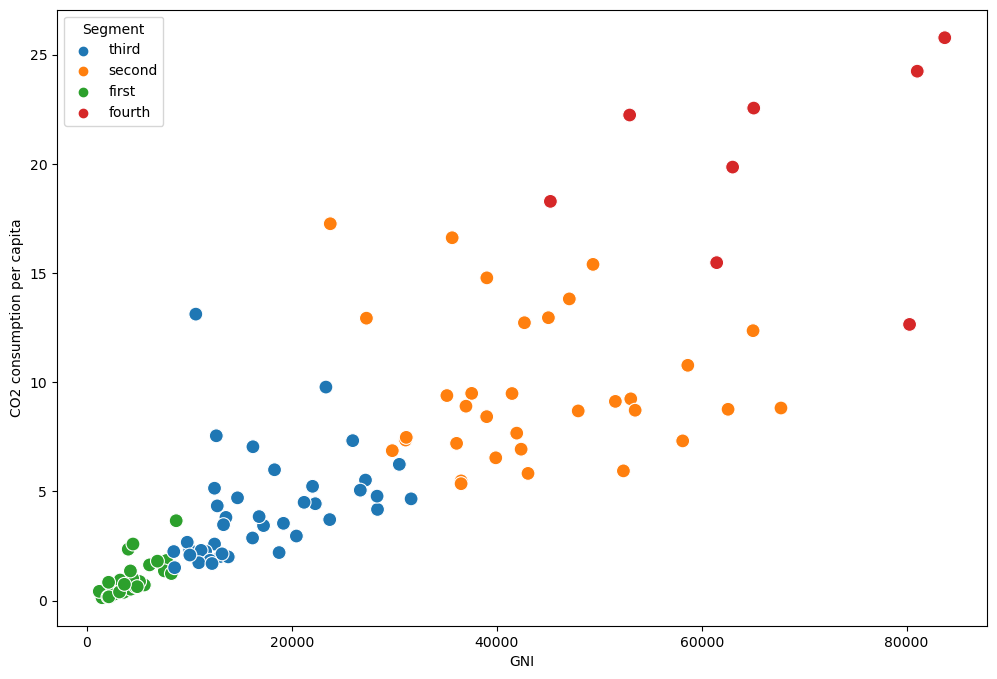

In [49]:
# Plot clusters for the 'GNI' and 'CO2 consumption' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['gni'], y=df_pca_kmeans['co2_consumption'], hue=df_pca_kmeans['Segment'], s=100)
ax.grid(False)
plt.xlabel('GNI')
plt.ylabel('CO2 consumption per capita')
plt.show()

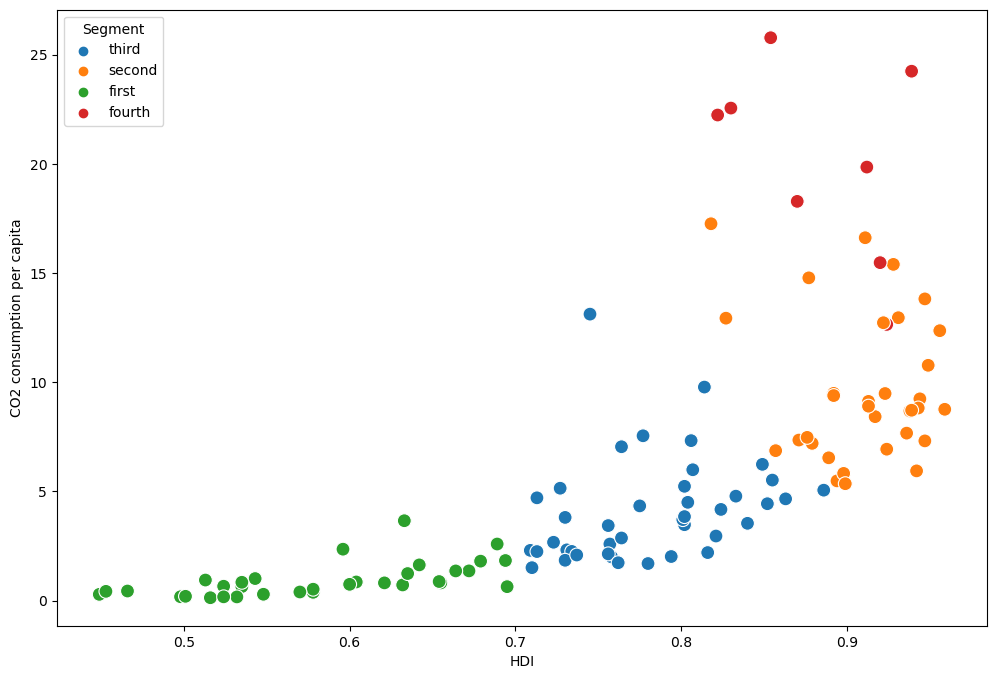

In [50]:
# Plot clusters for the 'HDI' and 'CO2 consumption' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['hdi'], y=df_pca_kmeans['co2_consumption'], hue=df_pca_kmeans['Segment'], s=100)
ax.grid(False)
plt.xlabel('HDI')
plt.ylabel('CO2 consumption per capita')
plt.show()

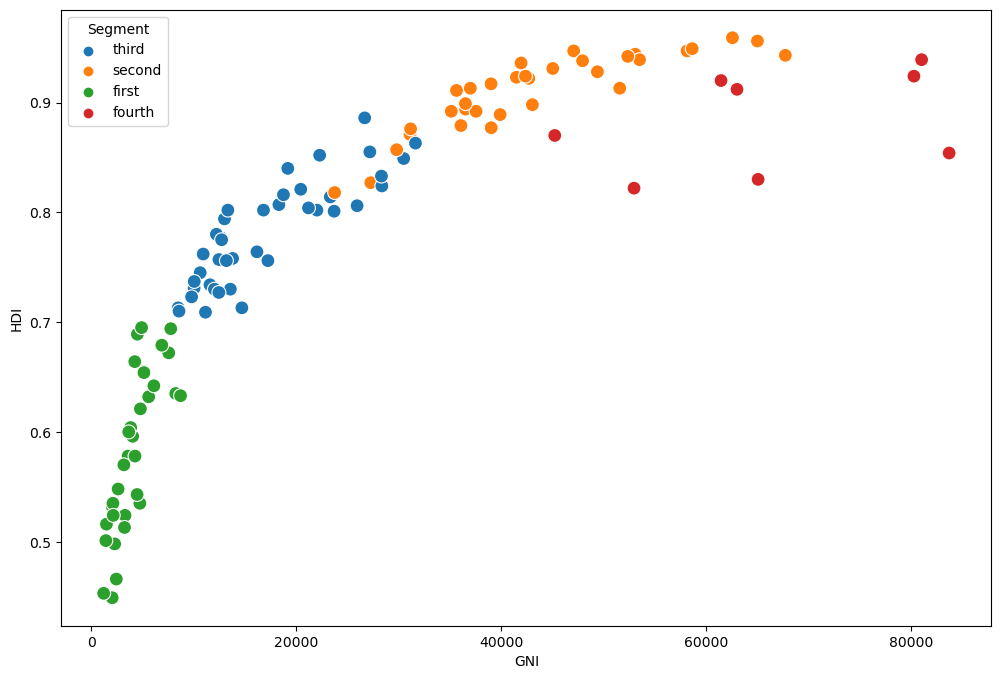

In [51]:
# Plot clusters for the 'GNI' and 'HDI' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['gni'], y=df_pca_kmeans['hdi'], hue=df_pca_kmeans['Segment'], s=100)
ax.grid(False)
plt.xlabel('GNI')
plt.ylabel('HDI')
plt.show()

In [58]:
# Create a 3d scatterplot of 'HDI', 'GNI' and 'CO2 consumption' with plotly

fig = px.scatter_3d(df_pca_kmeans, x='hdi', y='gni', z='co2_consumption', color='Segment')
fig.update_traces(marker_size = 3)
fig.show()

In [56]:
# Examine descriptive cluster statistics

df_pca_kmeans.groupby('Segment').agg({'year':['mean', 'median'],
                          'hdi':['mean', 'median'],
                          'gni':['mean', 'median'],
                          'co2_consumption':['mean', 'median']})

year               hdi                  gni                \
           mean  median      mean median          mean        median   
Segment                                                                
first    2020.0  2020.0  0.582667  0.578   4170.221939   4032.751435   
fourth   2020.0  2020.0  0.883875  0.891  66599.664023  64047.057840   
second   2020.0  2020.0  0.910636  0.917  43609.180092  41946.388220   
third    2020.0  2020.0  0.781024  0.777  17107.707082  14696.027010   

        co2_consumption             
                   mean     median  
Segment                             
first          0.934126   0.741153  
fourth        20.128798  21.039817  
second         9.650140   8.815055  
third          4.114404   3.705759

In [55]:
df_pca_kmeans['Segment'].value_counts()

third     41
second    33
first     33
fourth     8
Name: Segment, dtype: int64

A few exploratory facts become apparent in the above scatterplors and descriptive statistics:

1. Two clusters respectively appear to group together earlier and later years: The first and fourth have their mean and median in the early 2010s, and second and third cluster in the late 1990s.


2. The second and first cluster appear to contain the "less developed" countries, in earlier and later years. The same appears to apply to the "more developed" countries in the fourth and third clusters.


3. The third cluster comprises the lowest stats for HDI, GNI and CO2 values. The first cluster contains measurably higher HDI and GNI values, and slightly higher stats for CO2. Could that be indicative that while HDI and GNI of the "less developed" countries slightly increased over time, so did their CO2 footprint?


4. The fourth cluster is interesting because it contains the highest HDI and GNI values, but lower CO2 consumption than the second cluster (which contains the highest CO2). Could that be indicative that while HDI and GNI of the "more developed" countries over time, some managed to lower their CO2 footprint?